# 08 __Network Analysis__

## __Basic definitions in Graphs__

A __Graph__ is defined as a set of _nodes_, which are an abstraction of any entities,
and the connecting links between pairs of nodes called _edges_ or _relationships_.
The edge between two nodes can be _directed_ or _undirected_.
A directed edge means that the edge points from one node to the other and not the
other way around.
Depending on whether the edges of a graph are directed or undirected, the graph is called
a _directed graph_ or an _undirected graph_, respectively.

The _degree_ of a node is the number of edges that connect to it.
If  anetwork is directed, then nodes have two different degrees, the _in-degree_, which
is the number of incoming edges, and the _out-degree_, which is the number of
outgoing edges.

In some cases, there is information we would like to add to graphs to model
properties of the entities that the nodes represent or their relationships. We could add
_strengths_ or _weights_ to the links between the nodes, to represent some real-world
measure.

We define a _path_ in a network to be a sequence of nodes
connected by edges. Moreover, many applications of graphs require shortest paths
to be computed. The shortest path problem is the problem of finding a path between
two nodes in a graph such that the length of the path or the sum of the weights of
edges in the path is minimized.

A graph is said to be _connected_ if for every pair of nodes, there is a path between
them. A graph is _fully connected_ or _complete_ if each pair of nodes is connected by
an edge. A _connected component_ or simply a _component_ of a graph is a subset of its
nodes such that every node in the subset has a path to every other one.

A _subgraph_ is a subset of the
nodes of a graph and all the edges linking those nodes. Any group of nodes can form
a subgraph.

## __Social Network Analysis__

Social network analysis processes social data structured in graphs. It involves the
extraction of several characteristics and graphics to describe the main properties of
the network. Some general properties of networks, such as the shape of the network
degree distribution (defined bellow) or the average path length, determine the type
of network, such as a small-world network or a scale-free network. A small-world
network is a type of graph in which most nodes are not neighbors of one another, but
most nodes can be reached from every other node in a small number of steps. This
is the so-called small-world phenomenon which can be interpreted by the fact that
strangers are linked by a short chain of acquaintances. In a small-world network,
people usually form communities or small groups where everyone knows everyone else. Such communities can be seen as complete graphs. In addition, most the
community members have a few relationships with people outside that community.
However, some people are connected to a large number of communities. These may
be celebrities and such people are considered as the hubs that are responsible for
the small-world phenomenon. Many small-world networks are also scale-free networks. In a scale-free network the node degree distribution follows a power law (a
relationship function between two quantities x and y defined as y = x n , where n is
a constant). The name scale-free comes from the fact that power laws have the same
functional form at all scales, i.e., their shape does not change on multiplication by a
scale factor. Thus, by definition, a scale-free network has many nodes with a very few
connections and a small number of nodes with many connections. This structure is
typical of the World Wide Web and other social networks. In the following sections,
we illustrate this and other graph properties that are useful in social network analysis.

In [21]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


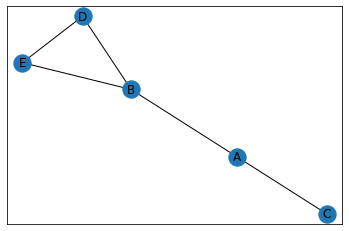

In [22]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('D', 'E')

nx.draw_networkx(G)

(-1.1897592290745465,
 0.996989982165463,
 -0.6310785929524879,
 1.0491399791293947)

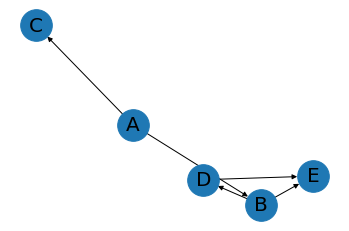

In [23]:
# To create a directed graph we use DiGraph:
G = nx.DiGraph()
G.add_edge('A', 'B')
G.add_edge('A', 'C')
G.add_edge('B', 'D')
G.add_edge('B', 'E')
G.add_edge('D', 'E')
nx.draw_networkx(G, node_size = 1000, font_size = 20)
plt.axis('off')

(-1.0825515631076217,
 1.0728846041777775,
 -1.0103575491645493,
 1.0957313118649785)

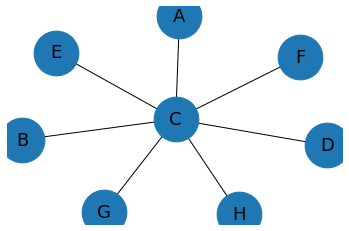

In [24]:
# Create a star graph
G = nx.Graph()
G.add_edge('A', 'C')
G.add_edge('B', 'C')
G.add_edge('D', 'C')
G.add_edge('E', 'C')
G.add_edge('F', 'C')
G.add_edge('G', 'C')
G.add_edge('H', 'C')

nx.draw_networkx(G, node_size = 2000, font_size = 18)
plt.axis('off')

### Data description of Facebook Network



Let's load the Facebook network into NetworkX. The network consists of an undirected and unweighted network that contains friendships between users of Facebook. The facebook dataset is defined by an edge list, so the file is a plain text file with one edge per line. The file is uncompressed and ready to load as follows.


In [25]:
fb = nx.read_edgelist('input/facebook_combined.txt')

In [26]:
# first extract info from graph without visualization
fb_n, fb_k = fb.order(), fb.size()
fb_avg_deg = fb_k / fb_n
print('nodes: ', fb_n)
print('edges: ', fb_k)
print('average degree: ', fb_avg_deg)

nodes:  4039
edges:  88234
average degree:  21.84550631344392


In [27]:
degrees = dict(fb.degree()).values()

Text(0.5, 1.0, 'Degree distribution')

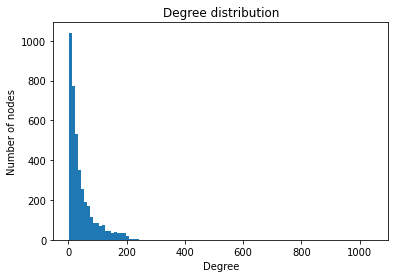

In [28]:
# plot the degree distribution
degree_hist = plt.hist(degrees, 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution')



Networks with power-law distributions are called scale-free networks, because power laws have the same functional form at all scales.

Next, let us find out if the Facebook dataset contains one or more than one connected components.


In [29]:
print(nx.number_connected_components(fb))

1




Let us prune the graph removing node '0' (arbitrarily selected) and compute the number of connected components of the pruned version of the graph:


In [30]:
fb_prunned = nx.read_edgelist('input/facebook_combined.txt')
fb_prunned.remove_node('0')

In [31]:
print(fb_prunned.number_of_nodes())
print(nx.number_connected_components(fb_prunned))

4038
19


In [32]:
# let us see the sizes of the 19 connected components
fb_components = nx.connected_components(fb_prunned)
print('sizes of conencted components: ',  [len(c) for c in fb_components])

sizes of conencted components:  [4015, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 1, 1, 1]
